# Import Dependencies

In [1]:
import numpy as np
import pandas as pd

from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image 
import pydotplus


from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import classification_report, accuracy_score

import random

list_number = 3

# Pre-processing data

In [2]:
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=2022)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_show = X_train
X_test_show = X_test

## reshape data

In [4]:
dim = 28 * 28
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)


## frequency of classes in training data

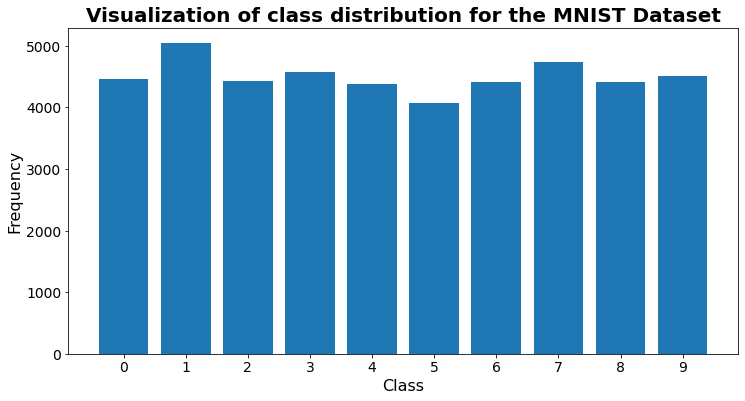

In [5]:
cnt_unique = np.unique(y_train, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(cnt_unique[0], cnt_unique[1])
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xticks(cnt_unique[0], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

# PCA

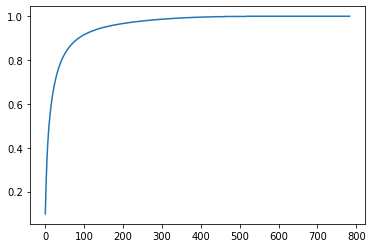

In [6]:
pca = PCA(svd_solver='full')
pca_model = pca.fit(X_train)

X_train_redim = pca_model.transform(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
plt.plot(np.arange(dim), explained_variance) 

# ? Question 1: Определите, какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.80 + номер_в_списке % 10. Построить график зависимости доли объясненной дисперсии от количества используемых ГК

In [7]:
variant_exp = 0.8 + (list_number % 10) / 100
pca = PCA(svd_solver='full')
pca_model = pca.fit(X_train)
X_train_redim = pca_model.transform(X_train)
X_test_redim = pca_model.transform(X_test)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

components = 0
cum_sum = 0
for i in range(dim):
  components += 1
  cum_sum += pca.explained_variance_ratio_[i]
  if cum_sum >= variant_exp:
    break

print(explained_variance[:components])

print("Explained Variance: " + str(round(cum_sum, 2)))
print("Number of Components: " + str(components))

[0.098 0.168 0.23  0.284 0.333 0.376 0.409 0.437 0.465 0.489 0.51  0.53
 0.547 0.564 0.58  0.595 0.608 0.621 0.633 0.644 0.655 0.665 0.675 0.684
 0.692 0.701 0.709 0.717 0.724 0.731 0.738 0.744 0.75  0.756 0.762 0.767
 0.772 0.777 0.782 0.787 0.791 0.796 0.8   0.804 0.808 0.811 0.815 0.818
 0.822 0.825 0.828 0.831]
Explained Variance: 0.83
Number of Components: 52


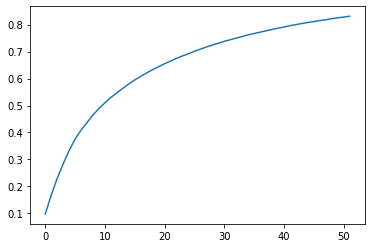

In [8]:
plt.plot(np.arange(components), explained_variance[:components]) 


# Build Model

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=2022)
clf.fit(X_train_redim, y_train)

In [ ]:
# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Create PNG file
Image(graph.create_png())

## Evaluate the model

In [ ]:
train_preds_baseline = clf.predict(X_train_redim)
test_preds_baseline = clf.predict(X_test_redim)

acc_baseline_train = accuracy_score(train_preds_baseline, y_train)
acc_baseline_val = accuracy_score(test_preds_baseline, y_test)

print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}')

# ? Question 2: Выведите количество верно классифицированных объектов класса номер_в_списке % 9 для тестовых данных

In [ ]:
y_pred = clf.predict(X_test_redim)

class_variant = list_number % 9
cm = confusion_matrix(y_test, y_pred)

print(f"The number of class {class_variant} images is: ", cm.sum(axis=1)[class_variant])

print("The number of correctly classified images contained in Class " + str(class_variant) + " is: " 
      + str(cm[class_variant][class_variant]))


# ? Question 3: Введите вероятность отнесения 5 любых изображений из тестового набора к назначенному классу

In [ ]:
num = random.randint(0, 10000)
result = (clf.predict_proba(X_test_redim)[num])[y_pred[num]]
plt.imshow(X_test_show[num], cmap='gray')
print("The probability that picture No." + str(num) + " belongs to Class " + 
      str(y_pred[num]) + " is: " + str(round(result, 3)))

# ? Question 4: Определите Accuracy, Precision, Recall и F1 для обученной модели

In [ ]:
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))


In [ ]:
print(classification_report(y_test, y_pred))